imports done!


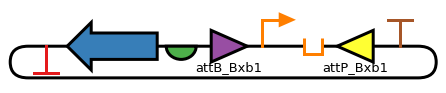

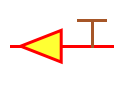

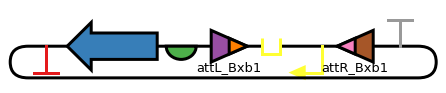

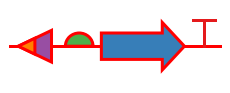

d:\documents\github\biocrnpyler\biocrnpyler\component.py:11: UserWarning: get_species is not defined for component plac, None returned.
  pywarn(txt)
d:\documents\github\biocrnpyler\biocrnpyler\component.py:11: UserWarning: No parameter found with param_name=cooperativity and part_id=plac_laci and mechanism=one_step_cooperative_binding. Parameter found under the key param_name=cooperativity
  pywarn(txt)
d:\documents\github\biocrnpyler\biocrnpyler\component.py:11: UserWarning: No parameter found with param_name=cooperativity and part_id=attB-Bxb1 and mechanism=one_step_cooperative_binding. Parameter found under the key param_name=cooperativity
  pywarn(txt)
d:\documents\github\biocrnpyler\biocrnpyler\component.py:11: UserWarning: No parameter found with param_name=cooperativity and part_id=attP-Bxb1 and mechanism=one_step_cooperative_binding. Parameter found under the key param_name=cooperativity
  pywarn(txt)
d:\documents\github\biocrnpyler\biocrnpyler\component.py:11: UserWarning: ge

IndexError: list index out of range

In [1]:
from biocrnpyler import *
#import biocrnpyler.integrases as integ
import numpy as np
import dnaplotlib as dpl
%matplotlib inline
print("imports done!")

ptet = RegulatedPromoter("ptet",["tetr"],leak=True)
plac = RegulatedPromoter("plac",["laci"],leak=True)
pconst = Promoter("pconst")
attB = AttachmentSite("attB","attB",integrase="Bxb1")
attP = AttachmentSite("attP","attP",integrase="Bxb1")
attL = AttachmentSite("attL","attL",integrase="Bxb1")
attR = AttachmentSite("attR","attR",integrase="Bxb1")
utr1 = RBS("UTR1")
utr2 = RBS("UTR2")
gfp = CDS("GFP","GFP")
fusrfp = CDS("fusRFP","RFP",no_stop_codons=["forward"])
rfp = CDS("RFP","RFP")
yfp = CDS("YFP","YFP")
t16 = Terminator("t16")




test_constructs = []
test_constructs += [DNA_construct([[t16,"reverse"],[gfp,"reverse"],[utr1,"reverse"],[attB,"forward"],[plac,"forward"],[attP,"reverse"],[t16,"forward"]],circular=True)]
test_constructs += [DNA_construct([[t16,"reverse"],[gfp,"reverse"],[utr1,"reverse"],[attL,"forward"],[plac,"reverse"],[attR,"reverse"],[t16,"forward"]],circular=True)]

for construct in test_constructs:
    plotConstruct(construct,debug=False,plot_rnas=True)

integrated = []

allconstructs = test_constructs+integrated

parameters={"cooperativity":2,"kb":100, "ku":10, "ktx":.05, "ktl":.2, "kdeg":2,"kint":.05}

components3 = [Protein("laci"),Protein("tetr")]+allconstructs
myMixture3 = TxTlExtract(name = "txtl", parameters = parameters, components = components3, parameter_warnings = False)
myCRN3 = myMixture3.compile_crn()

In [ ]:
tc2_spec = test_construct2.get_species()
rxn1 = rxnlist[0]
#print([a.pretty_print() for a in myCRN3.species])
#print(rxn1.intbound)
#print(rxn1.outputlists)
CRNspecies = myCRN3.species
rxn_dict_list = []
for rxn in rxnlist:
    #print("rxn!!")
    #print()
    rxnset = {}
    for specie in CRNspecies:
        if(rxn.is_valid_reactant(specie)):
            specname = specie.species[-1].name
            if(specname in rxnset):
                rxnset[specname] += [specie]
            else:
                rxnset[specname] = [specie]
    rxn_dict_list += [[rxnset,rxn]]

#print(rxn_dict_list)

    #print()
print("rxnsets")
for rxnset,rxn in rxn_dict_list:
    rxn_prototype = [rxnset[a] for a in rxnset]
    #print()
    #print(rxn_prototype)
    #print()
    rxn_allcomb = all_paths(rxn_prototype)
    for combo in rxn_allcomb:
        outputs = rxn.transform_ordered_complex(combo)

        
        #print(outputs)
        for outspec in outputs:
            if(outspec not in CRNspecies):
                print()
                print(outspec.material_type)
                print(type(outspec))
                print(outspec)
                print(outspec in CRNspecies)
                print()


In [ ]:
print(myCRN3.species)

In [2]:
from bokeh.models import (Plot , Range1d)
import bokeh.plotting
import bokeh.io
bokeh.io.output_notebook() #this makes the graph appear in line with the notebook
colordict={"complex":"cyan","protein":"green",
            "GFP":"lightgreen",
            "RFP":"red",
            "ribosome":"blue",
            "dna":"grey","rna":"orange",
            "ligand":"pink","phosphate":"yellow","nothing":"purple"}
layout_str = "force"
#print("one construct")
#DG, DGspec, DGrxn = generate_networkx_graph(myCRN,use_pretty_print=True,#colordict=colordict) #this creates the networkx objects
#plot = Plot(plot_width=500, plot_height=500, x_range=Range1d(-500, 500), #y_range=Range1d(-500, 500)) #this generates a 
#graphPlot(DG,DGspec,DGrxn,plot,layout=layout_str,posscale=1) #now you draw the network on the plot. Layout "force" is 
#bokeh.io.show(plot) #if you don't type this the plot won't show
#print("two constructs")
#DG, DGspec, DGrxn = generate_networkx_graph(myCRN2,use_pretty_print=True,colordict=colordict) #this creates the networkx objects
#plot = Plot(plot_width=500, plot_height=500, x_range=Range1d(-500, 500), y_range=Range1d(-500, 500)) #this generates a 
#graphPlot(DG,DGspec,DGrxn,plot,layout=layout_str,posscale=1) #now you draw the network on the plot. Layout "force" is 
#bokeh.io.show(plot) #if you don't type this the plot won't show
print("construct with two promoters")
DG, DGspec, DGrxn = generate_networkx_graph(myCRN3,use_pretty_print=True,colordict=colordict) #this creates the networkx objects
plot = Plot(plot_width=500, plot_height=500, x_range=Range1d(-500, 500), y_range=Range1d(-500, 500)) #this generates a 
graphPlot(DG,DGspec,DGrxn,plot,layout=layout_str,posscale=1) #now you draw the network on the plot. Layout "force" is 
bokeh.io.show(plot) #if you don't type this the plot won't show

Loading BokehJS ...

construct with two promoters
D:\anaconda3\lib\site-packages\bokeh\models\graphs.py:164: UserWarning: Node keys in 'layout_function' don't match node keys in the graph. These nodes may not be displayed correctly.
  warn("Node keys in 'layout_function' don't match node keys in the graph. "


In [ ]:
test_construct2 = DNA_construct([[pconst,"forward"],[utr1,"forward"],[gfp,"forward"],[attB,"forward"],[t16,"forward"]],name="mydna2")

test_construct3 = str(test_construct2)
#test_construct3 = copy.deepcopy(test_construct2)

print(test_construct2==test_construct3)
print(test_construct3.__hash__())
#print(str.__hash__(repr(test_construct2.get_species())))
#print(str.__hash__(repr(test_construct3.get_species())))
print(test_construct2.__hash__())